In [ ]:
## import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import glob
import os
from datetime import datetime

In [5]:
pwd

'/tmp/pycharm_project_674/2025-HL-Flaring-MEGS-AI'

In [9]:
## Check example wavelength .npy format
data = np.load("/mnt/data/ML-Ready-Data-No-Intensity-Cut/AIA-Data/2023-08-06T21:48:00.npy")
print(f"Shape:{data.shape}")
print(f"Datatype: {data.dtype}")
print(f"Max: {data.max()}")
print(f"Mean: {data.mean()}")
print(f"Std: {data.std()}")

Shape:(6, 512, 512)
Datatype: float32
Max: 6340.775390625
Mean: 124.85625457763672
Std: 229.08609008789062


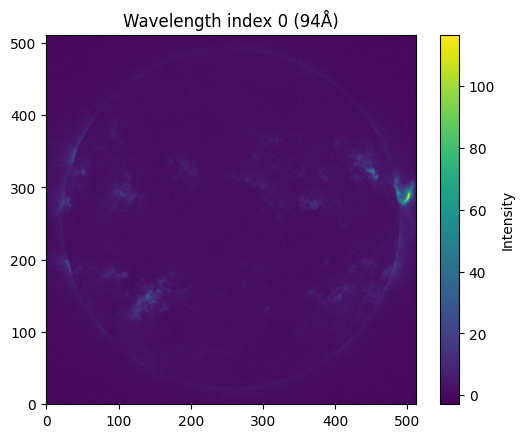

In [11]:
plt.imshow(data[0], origin='lower')
plt.colorbar(label='Intensity')
plt.title('Wavelength index 0 (94Å)')
plt.show()

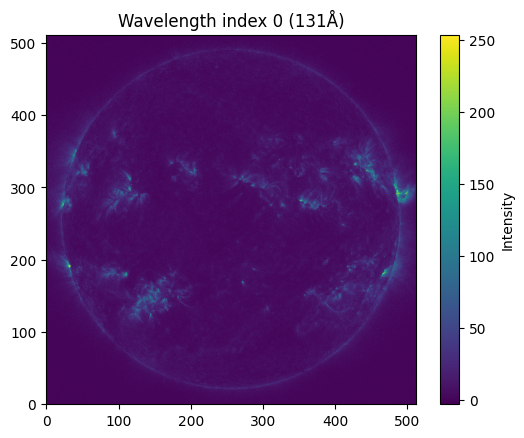

In [14]:
plt.imshow(data[1], origin='lower')
plt.colorbar(label='Intensity')
plt.title('Wavelength index 0 (131Å)')
plt.show()

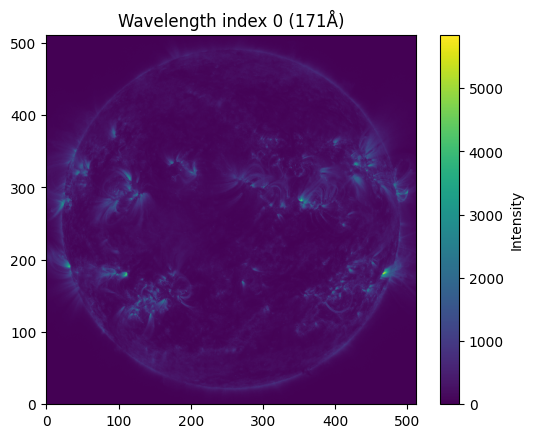

In [15]:
plt.imshow(data[2], origin='lower')
plt.colorbar(label='Intensity')
plt.title('Wavelength index 0 (171Å)')
plt.show()

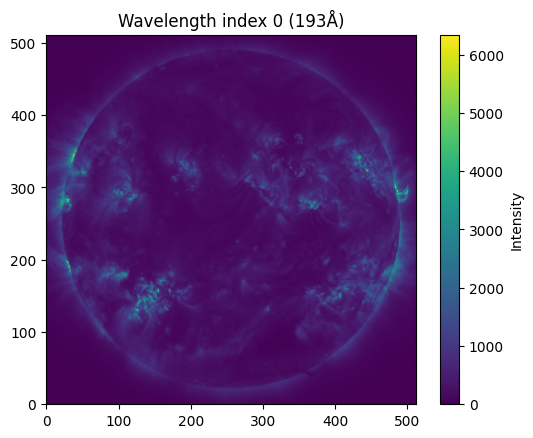

In [16]:
plt.imshow(data[3], origin='lower')
plt.colorbar(label='Intensity')
plt.title('Wavelength index 0 (193Å)')
plt.show()

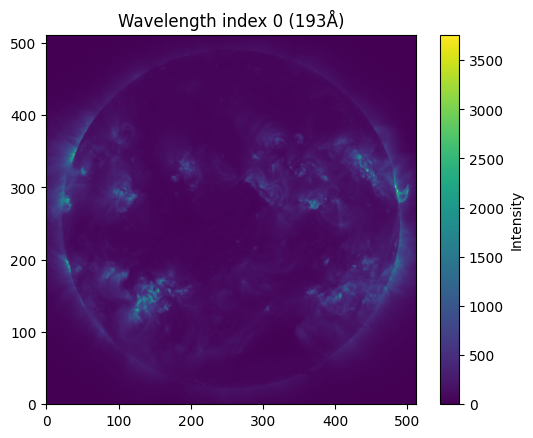

In [17]:
plt.imshow(data[4], origin='lower')
plt.colorbar(label='Intensity')
plt.title('Wavelength index 0 (193Å)')
plt.show()

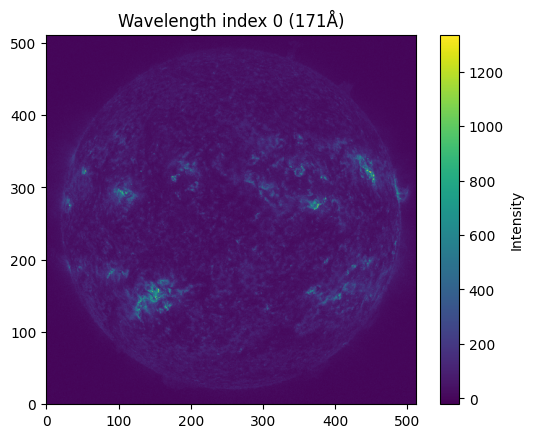

In [18]:
plt.imshow(data[5], origin='lower')
plt.colorbar(label='Intensity')
plt.title('Wavelength index 0 (171Å)')
plt.show()

In [ ]:
## Read example datafile to check for file types
data_dir = "/mnt/data/ML-Ready-Data-No-Intensity-Cut/AIA-Data"
output_dir = "/mnt/data/movies"
os.makedirs(output_dir, exist_ok=True)

wavelengths = ['94', '131', '171', '193', '211', '335']
num_channels = len(wavelengths)

## Get and sort files based on the timestamps for the .npy files
file_list = sorted(glob.glob(os.path.join(data_dir, "*.npy")),
                   key=lambda f: datetime.strptime(os.path.basename(f).replace(".npy", ""), "%Y-%m-%dT%H:%M:%S"))
print(f"Found {len(file_list)} .npy files")
if len(file_list) == 0:
    print(f"No .npy files found in {data_dir}")
    exit()

## create a channel frame to load all the channels
channel_frames = [[] for _ in range(num_channels)]
timestamps = []

for fname in file_list:
    try:
        cube = np.load(fname)  # shape = (6, H, W) 6 channels
        print(f"Processing {fname}: shape = {cube.shape}")
        if cube.ndim != 3 or cube.shape[0] != num_channels:
            print(f"Skipping {fname}: unexpected shape {cube.shape}")
            continue
        for i in range(num_channels):
            channel_frames[i].append(cube[i])
        timestamps.append(os.path.basename(fname).replace(".npy", ""))
    except Exception as e:
        print(f"Error loading {fname}: {e}")
        continue
print(f"First few file names: {file_list[:3]}")

# Debug: Check how many frames we have per channel
for i in range(num_channels):
    print(f"Channel {wavelengths[i]}: {len(channel_frames[i])} frames")
# Check if we have any valid data at all
total_frames = sum(len(frames) for frames in channel_frames)
if total_frames == 0:
    print("No valid data found. Please check your data files.")
    exit()
## Make a movie for each wavelength
for i in range(num_channels):
    frames = channel_frames[i]
    # Check if we have any frames for this channel
    if len(frames) == 0:
        print(f"Warning: No frames found for channel {wavelengths[i]}. Skipping...")
        continue
    print(f"Creating movie for channel {wavelengths[i]} with {len(frames)} frames")
    try:
        vmax = np.percentile(np.concatenate([f.ravel() for f in frames]), 99)
        fig, ax = plt.subplots(figsize=(6, 6))
        im = ax.imshow(frames[0], origin="lower", cmap="gray", vmin=0, vmax=vmax)
        title = ax.set_title(f"AIA {wavelengths[i].strip()} Å - {timestamps[0]}", fontsize=12)
        ax.axis("off")
        def update(frame_idx):
            im.set_array(frames[frame_idx])
            title.set_text(f"AIA {wavelengths[i].strip()} Å - {timestamps[frame_idx]}")
            return im, title
        ani = animation.FuncAnimation(fig, update, frames=len(frames), interval=100)
        ## Save the movies in .mp4 format, get rid of space in the wavelength
        wl_clean = wavelengths[i].strip()
        output_path = os.path.join(output_dir, f"aia_{wl_clean}.mp4")
        ani.save(output_path, fps=10, dpi=200)
        plt.close()
        print(f"Saved movie for AIA {wavelengths[i].strip()} Å to {output_path}")
    except Exception as e:
        print(f"Error creating movie for channel {wavelengths[i]}: {e}")
        continue
print("Movie generation complete!")

Found 61995 .npy files
Processing /mnt/data/ML-Ready-Data-No-Intensity-Cut/AIA-Data/2023-07-01T00:00:00.npy: shape = (6, 512, 512)
Processing /mnt/data/ML-Ready-Data-No-Intensity-Cut/AIA-Data/2023-07-01T00:01:00.npy: shape = (6, 512, 512)
Processing /mnt/data/ML-Ready-Data-No-Intensity-Cut/AIA-Data/2023-07-01T00:02:00.npy: shape = (6, 512, 512)
Processing /mnt/data/ML-Ready-Data-No-Intensity-Cut/AIA-Data/2023-07-01T00:03:00.npy: shape = (6, 512, 512)
Processing /mnt/data/ML-Ready-Data-No-Intensity-Cut/AIA-Data/2023-07-01T00:04:00.npy: shape = (6, 512, 512)
Processing /mnt/data/ML-Ready-Data-No-Intensity-Cut/AIA-Data/2023-07-01T00:05:00.npy: shape = (6, 512, 512)
Processing /mnt/data/ML-Ready-Data-No-Intensity-Cut/AIA-Data/2023-07-01T00:06:00.npy: shape = (6, 512, 512)
Processing /mnt/data/ML-Ready-Data-No-Intensity-Cut/AIA-Data/2023-07-01T00:07:00.npy: shape = (6, 512, 512)
Processing /mnt/data/ML-Ready-Data-No-Intensity-Cut/AIA-Data/2023-07-01T00:08:00.npy: shape = (6, 512, 512)
Proce